Epoch 1/1000
915/915 [==============================] - 6s 5ms/step - loss: 1200.4955 - val_loss: 858.8355
Epoch 2/1000
915/915 [==============================] - 3s 3ms/step - loss: 888.7099 - val_loss: 836.6642
Epoch 3/1000
915/915 [==============================] - 3s 3ms/step - loss: 870.9882 - val_loss: 820.0280
Epoch 4/1000
915/915 [==============================] - 3s 3ms/step - loss: 858.5305 - val_loss: 844.4045
Epoch 5/1000
915/915 [==============================] - 3s 3ms/step - loss: 853.1181 - val_loss: 799.4891
Epoch 6/1000
915/915 [==============================] - 3s 3ms/step - loss: 844.4901 - val_loss: 787.1415
Epoch 7/1000
915/915 [==============================] - 3s 3ms/step - loss: 831.3921 - val_loss: 772.3419
Epoch 8/1000
915/915 [==============================] - 3s 3ms/step - loss: 817.0462 - val_loss: 752.5867
Epoch 9/1000
915/915 [==============================] - 3s 3ms/step - loss: 800.9631 - val_loss: 732.6754
Epoch 10/1000
915/915 [======================

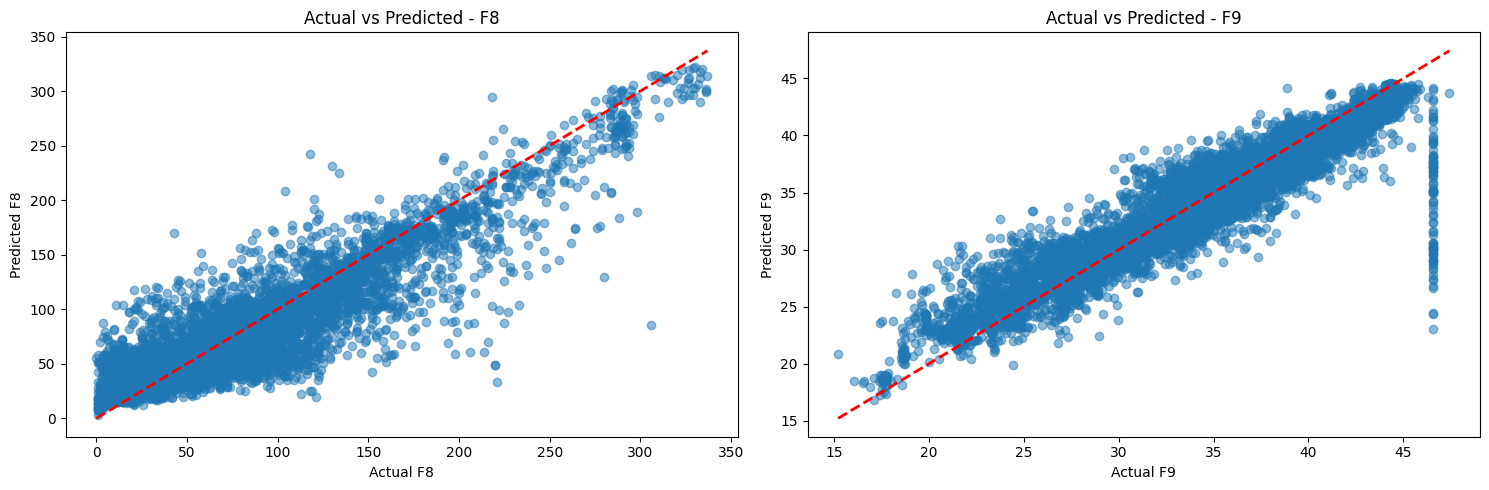

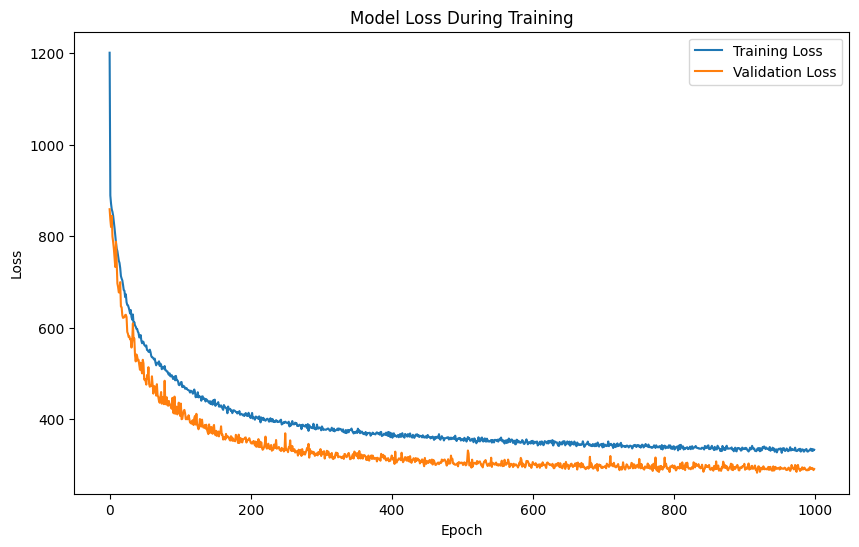

In [10]:

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Start timing
start_time = time.time()

# Load the dataset
df = pd.read_csv('CASP.csv')

# Prepare features and targets
X = df.drop(['F8', 'F9'], axis=1)
y = df[['F8', 'F9']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2)  # Output layer for F8 and F9
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train_scaled, 
    y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics for each target
targets = ['F8', 'F9']
for idx, target in enumerate(targets):
    print(f"\nMetrics for {target}:")
    mae = mean_absolute_error(y_test[target], y_pred[:, idx])
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred[:, idx]))
    r2 = r2_score(y_test[target], y_pred[:, idx])
    
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

# Calculate execution time
execution_time = time.time() - start_time
print(f"\nExecution time: {execution_time:.2f} seconds")

# Create plots for actual vs predicted values
plt.figure(figsize=(15, 5))

for idx, target in enumerate(targets):
    plt.subplot(1, 2, idx+1)
    plt.scatter(y_test[target], y_pred[:, idx], alpha=0.5)
    plt.plot([y_test[target].min(), y_test[target].max()], 
             [y_test[target].min(), y_test[target].max()], 
             'r--', lw=2)
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Actual vs Predicted - {target}')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

